In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import MultipleLocator, FixedLocator, FixedFormatter
import seaborn as sns

In [4]:
data = pd.read_csv("/kaggle/input/cattells-16-personality-factors/16PF/data.csv",delimiter="\t")

In [5]:
data

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  P7  P8  P9  P10  age  \
0       1   4   2   3   3   2   3   4   4    3  ...   1   2   5    2   17   
1       4   3   4   3   4   4   4   4   2    2  ...   3   2   2    2   37   
2       3   4   4   4   4   4   4   3   2    2  ...   2   3   3    3   31   
3       4   5   4   4   4   3   3   2   2    2  ...   2   3   4    4   32   
4       4   0   4   4   4   3   5   1   2    4  ...   4   2   3    2   46   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ..  ..  ...  ...   
49154   1   1   1   1   1   1   1   1   1    1  ...   1   1   1    1   24   
49155   4   5   4   4   4   3   5   3   2    3  ...   3   4   4    4   22   
49156   2   4   2   3   3   3   4   4   2    4  ...   3   4   5    4   29   
49157   4   4   4   4   4   4   4   4   1    3  ...   2   4   5    4   48   
49158   4   5   4   5   5   4   5   3   1    2  ...   1   4   4    5   18   

       gender  accuracy  country  source  elapsed  
0           1        92       US       6      914  
1           1       100       US       1      891  
2           1        80       US       6      903  
3           1        93       US       1      806  
4           2        87       NZ       1     1826  
...       ...       ...      ...     ...      ...  
49154       1       100       IN       1      274  
49155       1        50       ZA       1      584  
49156       2        85       BE       6      932  
49157       1        95       CZ       2     1212  
49158       2        99       GB       2      950  

[49159 rows x 169 columns]

In [12]:
" ,".join(data.columns.tolist())

'A1 ,A2 ,A3 ,A4 ,A5 ,A6 ,A7 ,A8 ,A9 ,A10 ,B1 ,B2 ,B3 ,B4 ,B5 ,B6 ,B7 ,B8 ,B9 ,B10 ,B11 ,B12 ,B13 ,C1 ,C2 ,C3 ,C4 ,C5 ,C6 ,C7 ,C8 ,C9 ,C10 ,D1 ,D2 ,D3 ,D4 ,D5 ,D6 ,D7 ,D8 ,D9 ,D10 ,E1 ,E2 ,E3 ,E4 ,E5 ,E6 ,E7 ,E8 ,E9 ,E10 ,F1 ,F2 ,F3 ,F4 ,F5 ,F6 ,F7 ,F8 ,F9 ,F10 ,G1 ,G2 ,G3 ,G4 ,G5 ,G6 ,G7 ,G8 ,G9 ,G10 ,H1 ,H2 ,H3 ,H4 ,H5 ,H6 ,H7 ,H8 ,H9 ,H10 ,I1 ,I2 ,I3 ,I4 ,I5 ,I6 ,I7 ,I8 ,I9 ,I10 ,J1 ,J2 ,J3 ,J4 ,J5 ,J6 ,J7 ,J8 ,J9 ,J10 ,K1 ,K2 ,K3 ,K4 ,K5 ,K6 ,K7 ,K8 ,K9 ,K10 ,L1 ,L2 ,L3 ,L4 ,L5 ,L6 ,L7 ,L8 ,L9 ,L10 ,M1 ,M2 ,M3 ,M4 ,M5 ,M6 ,M7 ,M8 ,M9 ,M10 ,N1 ,N2 ,N3 ,N4 ,N5 ,N6 ,N7 ,N8 ,N9 ,N10 ,O1 ,O2 ,O3 ,O4 ,O5 ,O6 ,O7 ,O8 ,O9 ,O10 ,P1 ,P2 ,P3 ,P4 ,P5 ,P6 ,P7 ,P8 ,P9 ,P10 ,age ,gender ,accuracy ,country ,source ,elapsed'

In [20]:
pd.set_option('display.max_rows', None)

def description(data):
    '''
    Returns the DataFrame representing a thorough description of the data.
    '''
    dtypes = data.dtypes
    counts = data.apply(lambda col: col.count())
    nulls = data.apply(lambda col: col.isnull().sum())
    nan_ratio = nulls / counts
    uniques = data.apply(lambda col: col.unique())
    n_uniques = data.apply(lambda col: col.nunique())
    #maxs = data.apply(lambda col: col.max())
    #mins = data.apply(lambda col: col.min())
    
    cols = {'dtypes':dtypes, 'counts':counts, 'nulls' : nulls, 'nan_ratio': nan_ratio,
            'n_uniques':n_uniques, 'uniques':uniques}
    return pd.DataFrame(data=cols)

In [21]:
description(data)

dtypes  counts  nulls  nan_ratio  n_uniques  \
A1         int64   49159      0   0.000000          6   
A2         int64   49159      0   0.000000          6   
A3         int64   49159      0   0.000000          6   
A4         int64   49159      0   0.000000          6   
A5         int64   49159      0   0.000000          6   
A6         int64   49159      0   0.000000          6   
A7         int64   49159      0   0.000000          6   
A8         int64   49159      0   0.000000          6   
A9         int64   49159      0   0.000000          6   
A10        int64   49159      0   0.000000          6   
B1         int64   49159      0   0.000000          6   
B2         int64   49159      0   0.000000          6   
B3         int64   49159      0   0.000000          6   
B4         int64   49159      0   0.000000          6   
B5         int64   49159      0   0.000000          6   
B6         int64   49159      0   0.000000          6   
B7         int64   49159      0   0.000000          6   
B8         int64   49159      0   0.000000          6   
B9         int64   49159      0   0.000000          6   
B10        int64   49159      0   0.000000          6   
B11        int64   49159      0   0.000000          6   
B12        int64   49159      0   0.000000          6   
B13        int64   49159      0   0.000000          6   
C1         int64   49159      0   0.000000          6   
C2         int64   49159      0   0.000000          6   
C3         int64   49159      0   0.000000          6   
C4         int64   49159      0   0.000000          6   
C5         int64   49159      0   0.000000          6   
C6         int64   49159      0   0.000000          6   
C7         int64   49159      0   0.000000          6   
C8         int64   49159      0   0.000000          6   
C9         int64   49159      0   0.000000          6   
C10        int64   49159      0   0.000000          6   
D1         int64   49159      0   0.000000          6   
D2         int64   49159      0   0.000000          6   
D3         int64   49159      0   0.000000          6   
D4         int64   49159      0   0.000000          6   
D5         int64   49159      0   0.000000          6   
D6         int64   49159      0   0.000000          6   
D7         int64   49159      0   0.000000          6   
D8         int64   49159      0   0.000000          6   
D9         int64   49159      0   0.000000          6   
D10        int64   49159      0   0.000000          6   
E1         int64   49159      0   0.000000          6   
E2         int64   49159      0   0.000000          6   
E3         int64   49159      0   0.000000          6   
E4         int64   49159      0   0.000000          6   
E5         int64   49159      0   0.000000          6   
E6         int64   49159      0   0.000000          6   
E7         int64   49159      0   0.000000          6   
E8         int64   49159      0   0.000000          6   
E9         int64   49159      0   0.000000          6   
E10        int64   49159      0   0.000000          6   
F1         int64   49159      0   0.000000          6   
F2         int64   49159      0   0.000000          6   
F3         int64   49159      0   0.000000          6   
F4         int64   49159      0   0.000000          6   
F5         int64   49159      0   0.000000          6   
F6         int64   49159      0   0.000000          6   
F7         int64   49159      0   0.000000          6   
F8         int64   49159      0   0.000000          6   
F9         int64   49159      0   0.000000          6   
F10        int64   49159      0   0.000000          6   
G1         int64   49159      0   0.000000          6   
G2         int64   49159      0   0.000000          6   
G3         int64   49159      0   0.000000          6   
G4         int64   49159      0   0.000000          6   
G5         int64   49159      0   0.000000          6   
G6         int64   49159      0   0.000000          6   
G7         int64   4

In [23]:
pd.set_option('display.max_rows', 50)

In [27]:
null_rows = data[data['country'].isnull()]
null_rows

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  P7  P8  P9  P10  age  \
16600   3   4   4   2   4   2   2   2   4    4  ...   4   4   4    3   26   
18248   5   1   5   1   1   1   5   5   5    2  ...   5   1   5    1   53   
19884   2   4   2   4   5   2   4   2   2    2  ...   4   4   4    3   40   
29619   4   4   4   5   5   5   4   1   1    1  ...   4   3   4    4   23   
37107   4   4   4   4   3   2   4   2   2    4  ...   4   2   4    4   60   
40277   4   4   4   4   4   4   4   4   2    3  ...   2   2   4    2   28   
40342   5   2   5   4   5   4   5   1   1    4  ...   5   5   1    1   33   
43545   5   5   5   4   5   4   5   4   1    1  ...   2   2   5    5   49   
46365   3   4   4   4   4   5   4   4   1    1  ...   1   2   4    4   44   
46960   5   5   5   5   5   5   5   1   1    5  ...   2   2   4    3   49   
47135   5   4   5   5   5   3   5   3   5    1  ...   3   2   4    3   48   
47404   5   5   5   4   5   5   4   1   2    1  ...   2   5   4    4   16   
48211   4   4   4   3   5   4   4   3   3    2  ...   3   3   4    4   22   
48327   1   1   1   1   1   1   1   1   5    3  ...   2   1   1    1   15   
48617   4   4   4   5   4   3   4   2   2    2  ...   3   3   4    4   21   
48908   3   3   3   2   4   4   2   1   4    2  ...   3   3   4    4   51   
49140   5   0   4   4   5   4   5   2   1    2  ...   2   2   4    4   29   

       gender  accuracy  country  source  elapsed  
16600       2       100      NaN       1      904  
18248       1       100      NaN       1      743  
19884       1        85      NaN       6      611  
29619       1        87      NaN       1     1233  
37107       1        85      NaN       6     1013  
40277       1        98      NaN       6     1071  
40342       2       100      NaN       1     1255  
43545       2       100      NaN       1      722  
46365       2        85      NaN       1     1229  
46960       2       100      NaN       6     1224  
47135       2       100      NaN       6      509  
47404       1       100      NaN       1      962  
48211       1        90      NaN       6     1502  
48327       1       100      NaN       1      753  
48617       1        90      NaN       1      321  
48908       2        98      NaN       2      593  
49140       2       100      NaN       1      634  

[17 rows x 169 columns]

In [ ]:
data = data.drop(null_rows.index,axis=0)

In [32]:
# Check if null rows have been deleted.
data[data['country'].isnull()]

Empty DataFrame
Columns: [A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, B12, B13, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, H1, H2, H3, H4, H5, H6, H7, H8, H9, H10, I1, I2, I3, I4, I5, I6, I7, I8, I9, I10, J1, J2, J3, J4, J5, J6, J7, ...]
Index: []

[0 rows x 169 columns]

## Data Preprocessing

In [42]:
# Encoding the categorical features

label_encoder = LabelEncoder()
data['country_encoded'] = label_encoder.fit_transform(data['country'].astype(str))
data = data.drop(['country'], axis=1)

In [43]:
# Standard scaling all features
std = StandardScaler()
data_std = pd.DataFrame(std.fit_transform(data), columns=data.columns)
data_std

A1        A2        A3        A4        A5        A6        A7  \
0     -2.322189  0.196762 -1.629391 -0.593583 -0.834739 -1.711725 -0.901521   
1      0.307235 -0.747595  0.181998 -0.593583  0.172919  0.337674  0.134893   
2     -0.569239  0.196762  0.181998  0.343390  0.172919  0.337674  0.134893   
3      0.307235  1.141119  0.181998  0.343390  0.172919 -0.687025 -0.901521   
4      0.307235 -3.580666  0.181998  0.343390  0.172919 -0.687025  1.171306   
...         ...       ...       ...       ...       ...       ...       ...   
49137 -2.322189 -2.636309 -2.535086 -2.467530 -2.850056 -2.736424 -2.974348   
49138  0.307235  1.141119  0.181998  0.343390  0.172919 -0.687025  1.171306   
49139 -1.445714  0.196762 -1.629391 -0.593583 -0.834739 -0.687025  0.134893   
49140  0.307235  0.196762  0.181998  0.343390  0.172919  0.337674  0.134893   
49141  0.307235  1.141119  0.181998  1.280364  1.180577  0.337674  1.171306   

             A8        A9       A10  ...        P7        P8        P9  \
0      0.891446  1.782818  0.529186  ... -1.536880 -0.769567  1.228818   
1      0.891446 -0.134550 -0.397389  ...  0.173851 -0.769567 -1.489380   
2      0.033553 -0.134550 -0.397389  ... -0.681515  0.056949 -0.583314   
3     -0.824340 -0.134550 -0.397389  ... -0.681515  0.056949  0.322752   
4     -1.682232 -0.134550  1.455761  ...  1.029217 -0.769567 -0.583314   
...         ...       ...       ...  ...       ...       ...       ...   
49137 -1.682232 -1.093233 -1.323964  ... -1.536880 -1.596083 -2.395446   
49138  0.033553 -0.134550  0.529186  ...  0.173851  0.883465  0.322752   
49139  0.891446 -0.134550  1.455761  ...  0.173851  0.883465  1.228818   
49140  0.891446 -1.093233  0.529186  ... -0.681515  0.883465  1.228818   
49141  0.033553 -1.093233 -0.397389  ... -1.536880  0.883465  0.322752   

            P10       age    gender  accuracy    source   elapsed  \
0     -1.307875 -0.004512 -1.174835 -0.004901  1.415457 -0.031331   
1     -1.307875 -0.004510 -1.174835 -0.004900 -0.833789 -0.031784   
2     -0.414556 -0.004511 -1.174835 -0.004902  1.415457 -0.031547   
3      0.478762 -0.004511 -1.174835 -0.004900 -0.833789 -0.033456   
4     -1.307875 -0.004509  0.782440 -0.004901 -0.833789 -0.013391   
...         ...       ...       ...       ...       ...       ...   
49137 -2.201194 -0.004512 -1.174835 -0.004900 -0.833789 -0.043920   
49138  0.478762 -0.004512 -1.174835 -0.004905 -0.833789 -0.037822   
49139  0.478762 -0.004511  0.782440 -0.004901  1.415457 -0.030977   
49140  0.478762 -0.004509 -1.174835 -0.004900 -0.383940 -0.025469   
49141  1.372081 -0.004512  0.782440 -0.004900 -0.383940 -0.030623   

       country_encoded  
0             0.857318  
1             0.857318  
2             0.857318  
3             0.857318  
4             0.080833  
...                ...  
49137        -0.716086  
49138         1.020788  
49139        -1.778643  
49140        -1.390401  
49141        -1.043026  

[49142 rows x 169 columns]

In [46]:
# Reducing dimensions to 3.
pca = PCA(n_components=3, random_state=12)  
data_reduced = pd.DataFrame(pca.fit_transform(data_std),)

data_reduced.head()

0         1         2
0  3.805594 -3.292238  4.613763
1  3.268640 -0.007686  2.515714
2  3.003524 -0.035569  3.080743
3  2.711560 -0.689996  1.855456
4  1.220400  0.341906  0.775022

In [48]:
# Create a scatterplot.
trace = go.Scatter3d(x=data_reduced[0], y=data_reduced[1], z=data_reduced[2], mode='markers',
                     marker=dict(size=3 ,opacity=0.8, color='green'),)
    
layout = go.Layout(title=dict(text='3D Data', x=0.5), width=600, height=600)
fig = go.Figure(data=[trace], layout=layout)

fig.show()

## Clustering

### K-Means

FInding optimal number of clusters.

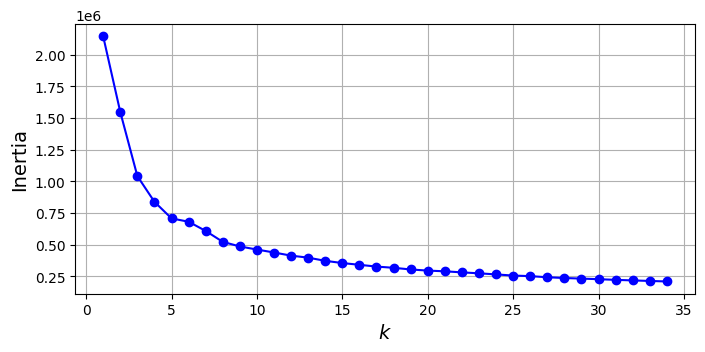

In [56]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=12, n_init='auto').fit(data_reduced) for k in range(1,35)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1,35), inertias, "bo-")

# plt.annotate('Elbow?',xy=(4, inertias[3]), xytext=(0.45, 0.55), textcoords='figure fraction',
#              fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))

plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)

ValueError: x and y must have same first dimension, but have shapes (13,) and (14,)

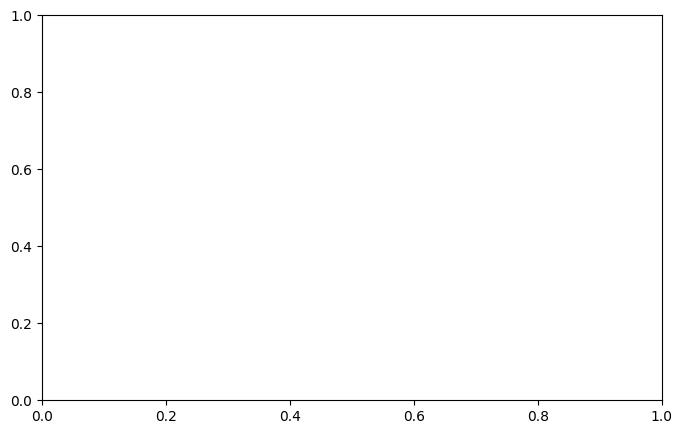

In [60]:
silhouette_scores = [silhouette_score(data_reduced, model.labels_, random_state=12) 
                     for model in kmeans_per_k[1:15]]



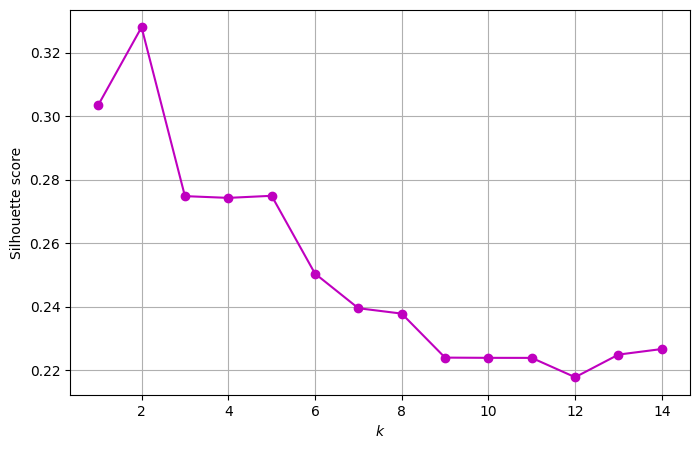

In [61]:
plt.figure(figsize=(8,5))
plt.plot(range(1,15),silhouette_scores,'mo-')
plt.xlabel("$k$", )
plt.ylabel("Silhouette score", )
plt.grid(True)

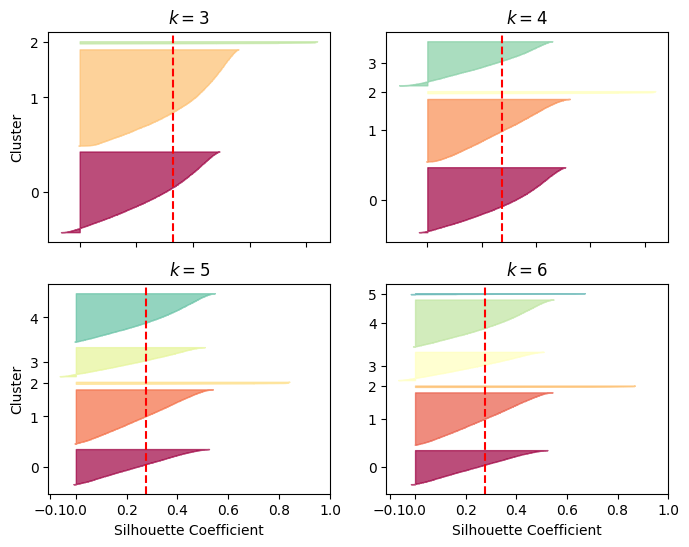

In [64]:
plt.figure(figsize=(8,6))

for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coeffs = silhouette_samples(data_reduced, y_pred)
    
    padding = len(data_reduced) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coeffs[y_pred == i]   # cluster coeffs
        coeffs.sort()
        
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, 
                          edgecolor=color, alpha=0.7)
        
        ticks.append(pos + len(coeffs)//2)
        pos +=len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3,5):
        plt.ylabel("Cluster")
    if k in (5,6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title("$k={}$".format(k),)

In [65]:
data_copy=data.copy()

In [81]:
kmeans = KMeans(n_clusters=5, random_state=12, n_init='auto')

data_copy['kmeans_cluster'] = kmeans.fit_predict(data_reduced) # Fit the model and predict clusters
data_copy['kmeans_cluster'] = data_copy['kmeans_cluster'].astype('category')

In [69]:
def plot_clusters3d(cluster_groups, cluster_col, title, colorscale=None, legend=True):
    '''
    Creates a 3D scatterplot of clusters. The color of data points is determined by colorscale parameter.
    '''
    # Create a figure.
    fig = go.Figure()
    
    # Plot scatter points for each cluster.
    for cluster in cluster_groups[cluster_col].unique():
        # Get the data points for that specific cluster.
        cluster_group = cluster_groups[cluster_groups[cluster_col] == cluster]
        # Add some scatter belonging to the cluster to the plot.
        trace = go.Scatter3d(x=cluster_group[0], y=cluster_group[1], z=cluster_group[2], 
                             mode='markers', marker=dict(size=4 ,opacity=0.8, colorscale=colorscale), 
                             legendwidth=2, name=cluster,)
        fig.add_trace(trace)
        
    # Add title and legend.
    fig.update_layout(showlegend=legend, width=700, height=600, 
                      legend=dict(font=dict(size=20), itemsizing="constant", ),
                      title=dict(text=title, x=0.5))
    fig.show()

In [82]:
temp = data_reduced.copy()
cluster_col = 'kmeans_cluster'
temp[cluster_col] = data_copy[cluster_col].copy()
temp.sort_values(by=cluster_col, inplace=True)

plot_clusters3d(cluster_groups=temp, cluster_col=cluster_col, colorscale='rainbow',
                title='The Plot of Clusters (KMeans)')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



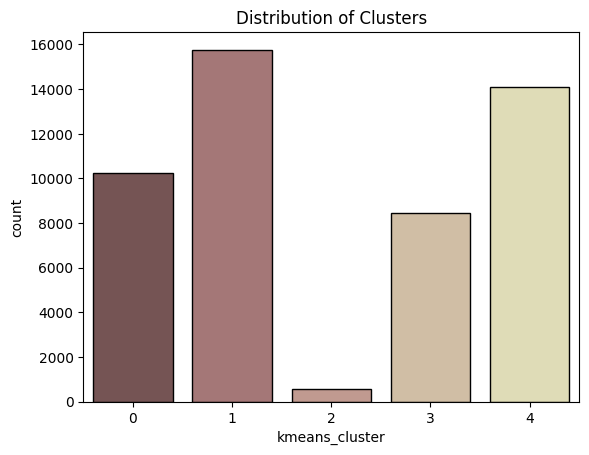

In [83]:
sns.countplot(x=data_copy['kmeans_cluster'], palette=sns.color_palette("pink"),edgecolor='black')
plt.title('Distribution of Clusters');

In [84]:
kmeans = KMeans(n_clusters=16, random_state=12, n_init='auto')

data_copy['kmeans_cluster'] = kmeans.fit_predict(data_reduced) # Fit the model and predict clusters
data_copy['kmeans_cluster'] = data_copy['kmeans_cluster'].astype('category')

In [85]:
temp = data_reduced.copy()
cluster_col = 'kmeans_cluster'
temp[cluster_col] = data_copy[cluster_col].copy()
temp.sort_values(by=cluster_col, inplace=True)

plot_clusters3d(cluster_groups=temp, cluster_col=cluster_col, colorscale='rainbow',
                title='The Plot of Clusters (KMeans)')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



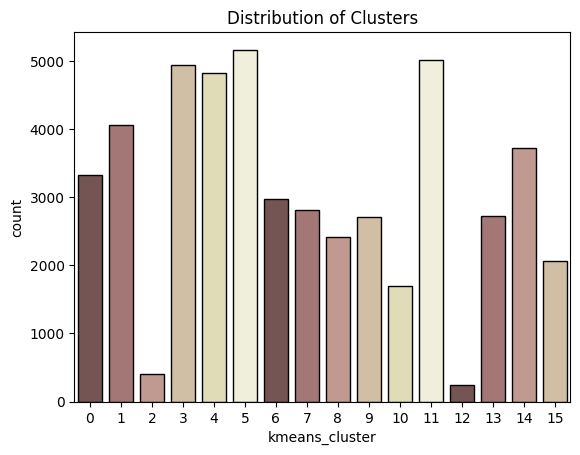

In [86]:
sns.countplot(x=data_copy['kmeans_cluster'], palette=sns.color_palette("pink"),edgecolor='black')
plt.title('Distribution of Clusters');

## Further steps:
- Finding feature importances using clf for Kmeans
- Analyzing the most important columns vs. generated by KMeans labels 
- BIRCH for clustering

In [87]:
# data_copy with labels
# x=data_copy.drop["kmeans_cluster"], y=data_copy["kmeans_cluster"]

# Extract feature importances from the ET model and plot them.
# imp_features = pd.Series(clf.feature_importances_, 
#                          index = X_train.columns).sort_values(ascending=False)
# plt.figure(figsize=(7,6))
# sns.barplot(x=imp_features, y=imp_features.index, palette='winter')
# plt.title('Feature Importances', fontsize=14)
# plt.xlabel('Importance Score')